# Uczenie bez nadzoru

> Czy można skonstruować algorytm, który uczy się czegoś na temat wektorów wejściowych nie mając określonych wartości wyjściowych? 


* Formalnie ciąg uczący składa się z samych wektorów wejściowych $\lbrace x^{(j)}\rbrace _{j=1,\dots ,m}$ 

* Algorytm ma "nauczyć się" wyróżniać w tym zbiorze pewną strukturę. 
* Będziemy mówić, że algorytm dokonał podziału zbioru uczącego na _skupiska_ (klastry). 
* W statystyce podejście takie nazywane jest <i>analizą skupień</i>.
* Zastosowania: 
  * poznawcze - kiedy próbujemy wydobyć jakąś wiedzę na temat zbioru uczącego (data mining), 
  * utylitarne - kiedy stosujemy analizę skupień np. w celu segmentacji obrazu lub klasyfikacji.

# Analiza skupień: $k$ - średnich

Jednym z podstawowych algorytmów stosowanych w analizie skupień jest analiza metodą $k$-średnich (ang. $k$-means). 

* Zakładamy, że występuje $k$ skupisk (ta wiedza jest zewnętrzna względem algorytmu). 

* Chcielibyśmy każdemu punktowi ze zbioru uczącego przyporządkować jakąś etykietkę $\lbrace {1}, \dots ,{k}\rbrace $, ale nie mamy wiedzy o jakimś "prawidłowym" podziale.

## Algorytm $k$ - średnich:

* W losowy sposób zainicjuj centra skupisk: $\mu _{1},\dots ,\mu _{k}$. Centra są punktami w przestrzeni o tej samej wymiarowości co punkty zbioru uczącego, np. można wybrać w sposób losowy $k$ punktów spośród elementów zbioru uczącego.
* Powtarzaj, aż zbiegniesz: 
* Dla każdego punktu $x^{(j)}$ ze zbioru uczącego przypisz etykietkę $c^{(j)}$ najbliższego centrum:

$\qquad$$c^{j} = \arg \min _{i}||x^{(j)} - \mu _{i}||^{2}$

* Zauktualizuj położenia centrów każdego skupiska, tak aby były środkiem ciężkości punktów należących do danego skupiska:

$\qquad$$
\mu _{i} = \frac{\sum _{j=1}^{m} 1\lbrace c^{(j)}== i\rbrace x^{(j)}}{\sum _{j=1}^{m} 1\lbrace  c^{(j)} == i\rbrace }
$

Jako miarę jakości podziału można wprowadzić sumę kwadratów odległości punktów od centrów skupisk, do których zostały przypisane:

$\qquad$$
J(c,\mu ) = \sum _{j=1}^{m} ||x^{(j)}-\mu _{c^{(j)}}||^{2}
$

*  można na algorytm $k$-średnich patrzeć jak na algorytm spadku osiowego, gdzie osiami są etykietki $c$ i centra $\mu $. 
* Widać, że dwa kroki wewnętrznej pętli to optymalizacja $c$ i $\mu $ na zmianę.
* Algorytm $k$-średnich jest zbieżny w takim sensie, że po każdym kroku iteracji funkcja $J$ maleje, więc ostatecznie osiągnie jakieś minimum. 
* Teoretycznie możliwe jest, że algorytm wpadnie w oscylacje pomiędzy dwoma podziałami, które maja dokładnie takie samo $J$, ale jest to bardzo mało prawdopodobne.
* Niestety optymalizacja $k$-średnich nie jest optymalizacją wypukłą, a co za tym idzie jest podatna na występowanie lokalnych minimów. 
* Najprostszym środkiem zaradczym jest wielokrotne wystartowanie algorytmu z różnych losowych zestawów centrów i wybór takiej parametryzacji, która daje najmniejsze $J$.

## Klasyfikacja:

Po znalezieniu optymalnych położeń centrów, mogą one być wykorzystane do klasyfikacji nowych przypadków. Wystarczy policzyć odległość rozważanego punktu od każdego z centrów i przypisanie mu klasy związanej z najbliższym centrum.

# Gaussowski model mieszany

> Jak zamodelować rozkład gęstości prawdopodobieństwa, który nie ma jakiejś konkretnej postaci?

* jako sumę rozkładów gaussowskich. 

* Taki rozkład może się nam przydać np. do wykrywania artefaktów. 
  * Załóżmy, że mamy sygnały EEG, o których wiemy, że nie zawierają artefaktów. Możemy je scharakteryzować za pomocą pewnych wektorów cech (np. współczynniki Fourierowskie). Jeśli uda nam się opisać jakoś sensownie rozkład prawdopodobieństwa tych cech to można go potem użyć do testowania jakie jest prawdopodobieństwo, że czy nowy fragment sygnału również jest z tego rozkładu, tzn. jest wolny od artefaktów.
  

* W bardziej zaawansowanych zastosowaniach można sobie wyobrazić rozszerzenie gaussowskiej analizy dyskryminacyjnej (model generatywny) na przypadki gdzie prawdopodobieństwa apriori opisywane są przez modele mieszane.

## Sformułowanie problemu

* Załóżmy, że jak zwykle mamy dany zbiór treningowy: 

$\qquad$$\lbrace  x^{(j)}\rbrace _{j=1,\dots ,m}$. 

* Chcemy zamodelować te dane przy pomocy rozkładu prawdopodobieństwa 

$\qquad$$p(x^{(j)},z^{(j)}) = p(x^{(j)}|z^{(j)})p(z^{(j)})$. 

* Zmienna $z^{(j)}$ pochodzi z rozkładu wielorakiego parametryzowanego przez $\lbrace \phi _{i}\rbrace _{i = 1,\dots ,k}$ $\quad$($\phi _{i }= p(z^{(j)}=i)$, $\phi _{i}>0, \sum _{i}\phi _{i}=1$).

* O rozkładach warunkowych zakładamy, że są Gaussowskie: 

$\qquad$$(x^{(j)}|z^{j}=i) \sim \mathcal {N}(\mu _{i},\Sigma _{i})$. 

* Innymi słowy: myślimy o zmiennych ze zbioru treningowego, że powstały w następujący sposób: 
  * najpierw z rozkładu wielorakiego została wylosowana zmienna $z^{(j)}$, wskazując na konkretny rozkład Gaussa $\mathcal {N}(\mu _{i},\Sigma _{i})$. 
  * Następnie ze wskazanego rozkładu Gaussa została wylosowana zmienna $x^{(j)}$. 
  * Zmienne losowe $z$ są w tym problemie zmiennymi ukrytymi, tzn. nie możemy ich obserwować.

## Funkcja log-wiarygodności
Model jest zatem opisywany przez parametry $\phi ,\mu ,\Sigma $. Możemy dla nich napisać funkcję log-wiarygodności:

$\begin{matrix}
l (\phi ,\mu , \Sigma ) &=& \sum _{j=1}^{m} \log p(x^{(j)};\phi ,\mu \Sigma ) \\
&=& \sum _{j=1}^{m}\log \sum _{z^{(j)}=1}^{k}p(x^{(j)}|z^{(j)};\mu ,\Sigma )p(z^{(j)};\phi )
\end{matrix}$

Zobaczmy, że gdybyśmy wiedzieli, do którego gaussa należy $j$-ty przykład w ciągu uczącym, tzn znali $z^{(j)}$ problem byłby prosty. Można by wówczas przepisać funkcję log-wiarygodności do postaci:

$\qquad$$
l (\phi ,\mu , \Sigma ) = \sum _{j=1}^{m}\left( \log p(x^{(j)}|z^{(j)};\mu ,\Sigma ) + \log p(z^{(j)};\phi )\right)
$

Licząc pochodne cząstkowe po parametrach i kładąc je równe zero otrzymalibyśmy:

$\qquad$$\begin{matrix}
\phi _{i} &=& \frac{1}{m}\sum _{j=1}^{m} 1\lbrace z^{(j)}== i\rbrace  \\
\mu _{i} &=& \frac{\sum _{j=1}^{m} 1\lbrace z^{(j)}== i\rbrace  x^{(j)}}{\sum _{j=1}^{m}1\lbrace z^{(j)} == i\rbrace }\\
\Sigma _{i}&=& \frac{\sum _{j=1}^{m} 1\lbrace z^{(j)}== i\rbrace  (x^{(j)}-\mu _{i})(x^{(j)}-\mu _{i})^{T} }{\sum _{j=1}^{m} 1\lbrace z^{(j)}== i\rbrace }
\end{matrix}$

> Niestety to, że nie znamy wartości $z^{(j)}$ powoduje, że funkcji log-wiarygodności nie da się zmaksymalizować w tak prosty sposób.

## Algorytm expectation maximization (EM)

* Rozwiązanie sformułowanego powyżej problemu można uzyskać w sposób iteracyjny. 
* Na przemian trzeba wykonywać kroki $E$ i $M$. 
* Krok $E$ polega na "zgadnięciu" wartości $z^{(j)}$,
* w kroku $M$ uaktualniane są parametry modelu przez maksymalizację funkcji log-wiarygodności (dla właśnie odgadniętych $z^{(j)}$). 

Zatem algorytm wygląda następująco:


1. Zainicjuj parametry: $\qquad$ $\phi_i$, $\mu_i$, $\Sigma_i$
2. Powtarzaj, aż zbiegniesz {
   * **krok $E$**
     * dla każdego $i$:
       * dla każdego $j$: 
         * oblicz prawdopodobieństwo cech przykładu $j$ w $i$-tym Gaussie: 
         $$p(x^{(j)} | z^{(j)} = i; \mu , \Sigma ) =\\ \frac{1}{(2\pi )^{n/2} |\Sigma_i |^{1/2}} \exp 
\left( -\frac{1}{2}(x^{(j)} - \mu_i )^T \Sigma_i^{-1} (x^{(j)} -\mu_i )\right)$$
         * podstaw:  $$p(z^{(j)}=i;\phi ) = \phi _{i}$$
         * oblicz z tw. Bayesa że $j$-ty przykład jest z $i$-tego Gaussa:  $$p(z^{(j)}=i|x^{(j)};\phi ,\mu ,\Sigma ) = \frac{p(x^{(j)}|z^{(j)}=i;\mu ,\Sigma ) p(z^{(j)}=i;\phi )}{\sum _{l=1}^{k} p(x^{(j)}|z^{(j)}=l; \mu ,\Sigma )p(z^{(j)}=l;\phi )}$$
         * przypisz:  $$w_{i}^{(j)} = p(z^{(j)}=i|x^{(j)}; \phi ,\mu ,\Sigma )$$
   * **krok $M$**
	  * uaktualnij parametry: 
        * $\phi _{i}  = \frac{1}{m}\sum _{j=1}^{m} w_{i}^{(j)} $
        * $\mu _{i} = \frac{\sum _{j=1}^{m} w_{i}^{(j)} x^{(j)}}{\sum _{j=1}^{m} w_{i}^{(j)}}$
        * $\Sigma _{i} = \frac{\sum _{j=1}^{m} w_{i}^{(j)} (x^{(j)}-\mu _{i})(x^{(j)}-\mu _{i})^{T} }{\sum _{j=1}^{m} w_{i}^{(j)}}$
        
}


Algorytm EM jest podatny na lokalne minima, więc dobrze jest stosować go z kilkukrotnym losowym wyborem początkowych parametrów.

Rozmiar zbioru uczącego:  (250, 2)


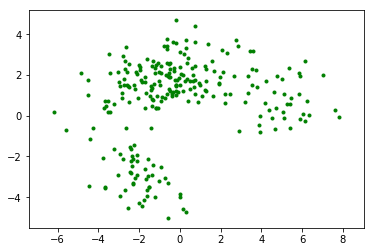

INIT:
cetrum:  [[-4.47086    -3.43635728]]
kowariancja: [[7.67855404 0.        ]
 [0.         4.52599488]]
prawd. tego Gaussa:  0.5
INIT:
cetrum:  [[ 7.81099432 -0.07821947]]
kowariancja: [[7.67855404 0.        ]
 [0.         4.52599488]]
prawd. tego Gaussa:  0.5
------------------
i:  0  phi:  0.6
i:  0  mu: [-1.78  0.02]
Sigma:  [[1.83 0.43]
 [0.43 5.48]]
i:  1  phi:  0.4
i:  1  mu: [2.45 1.65]
Sigma:  [[ 5.76 -1.44]
 [-1.44  1.47]]
(EM) stara i nowa funkcja log-wiarygodności:  4.611686018427388e+18 -1664.4346682077266


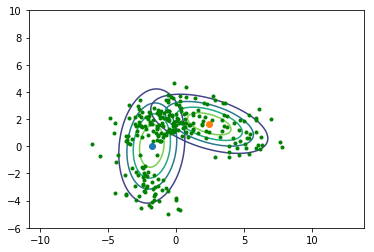

------------------
i:  0  phi:  0.59
i:  0  mu: [-1.77 -0.01]
Sigma:  [[1.84 0.55]
 [0.55 5.72]]
i:  1  phi:  0.41
i:  1  mu: [2.27 1.62]
Sigma:  [[ 6.38 -1.4 ]
 [-1.4   1.27]]
(EM) stara i nowa funkcja log-wiarygodności:  -1664.4346682077266 -1079.4877030473108


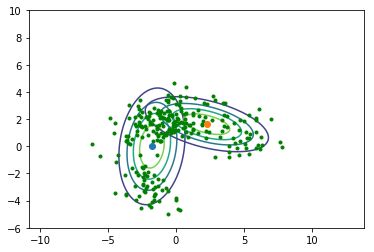

------------------
i:  0  phi:  0.56
i:  0  mu: [-1.78 -0.07]
Sigma:  [[1.85 0.59]
 [0.59 5.86]]
i:  1  phi:  0.44
i:  1  mu: [2.09 1.62]
Sigma:  [[ 6.81 -1.36]
 [-1.36  1.2 ]]
(EM) stara i nowa funkcja log-wiarygodności:  -1079.4877030473108 -1076.1564839283603


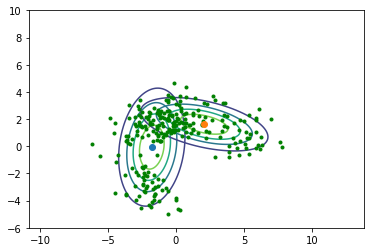

------------------
i:  0  phi:  0.54
i:  0  mu: [-1.79 -0.14]
Sigma:  [[1.84 0.6 ]
 [0.6  5.95]]
i:  1  phi:  0.46
i:  1  mu: [1.91 1.63]
Sigma:  [[ 7.14 -1.32]
 [-1.32  1.15]]
(EM) stara i nowa funkcja log-wiarygodności:  -1076.1564839283603 -1074.1417878648672


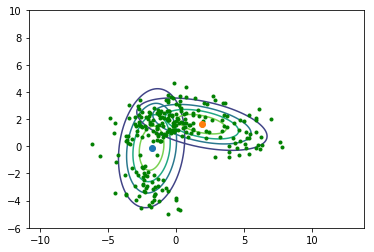

------------------
i:  0  phi:  0.52
i:  0  mu: [-1.81 -0.23]
Sigma:  [[1.83 0.59]
 [0.59 6.02]]
i:  1  phi:  0.48
i:  1  mu: [1.75 1.63]
Sigma:  [[ 7.37 -1.28]
 [-1.28  1.12]]
(EM) stara i nowa funkcja log-wiarygodności:  -1074.1417878648672 -1072.5342135256863


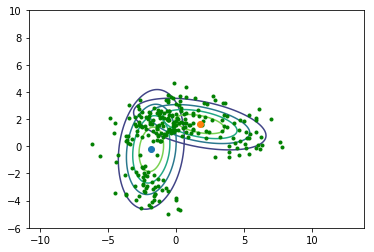

------------------
i:  0  phi:  0.5
i:  0  mu: [-1.84 -0.32]
Sigma:  [[1.81 0.56]
 [0.56 6.07]]
i:  1  phi:  0.5
i:  1  mu: [1.62 1.64]
Sigma:  [[ 7.54 -1.25]
 [-1.25  1.1 ]]
(EM) stara i nowa funkcja log-wiarygodności:  -1072.5342135256863 -1071.2234465504775


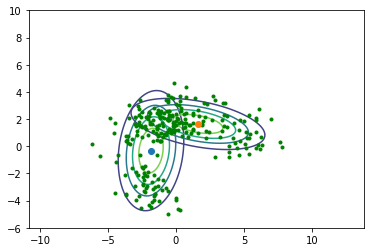

------------------
i:  0  phi:  0.48
i:  0  mu: [-1.86 -0.41]
Sigma:  [[1.78 0.52]
 [0.52 6.09]]
i:  1  phi:  0.52
i:  1  mu: [1.5  1.65]
Sigma:  [[ 7.64 -1.21]
 [-1.21  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1071.2234465504775 -1070.1633349943124


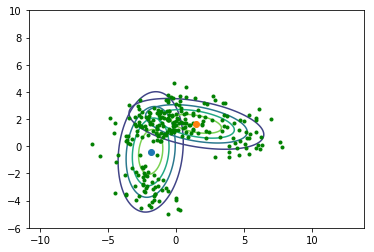

------------------
i:  0  phi:  0.46
i:  0  mu: [-1.89 -0.51]
Sigma:  [[1.76 0.48]
 [0.48 6.09]]
i:  1  phi:  0.54
i:  1  mu: [1.41 1.66]
Sigma:  [[ 7.7  -1.18]
 [-1.18  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1070.1633349943124 -1069.3059288578363


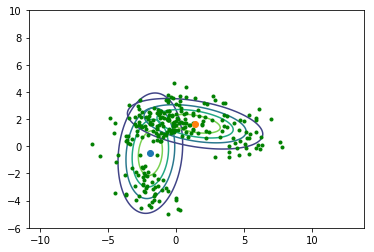

------------------
i:  0  phi:  0.44
i:  0  mu: [-1.91 -0.6 ]
Sigma:  [[1.73 0.42]
 [0.42 6.07]]
i:  1  phi:  0.56
i:  1  mu: [1.33 1.66]
Sigma:  [[ 7.74 -1.15]
 [-1.15  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1069.3059288578363 -1068.6015891066722


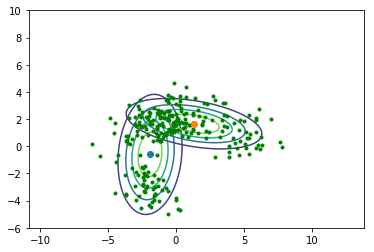

------------------
i:  0  phi:  0.42
i:  0  mu: [-1.94 -0.69]
Sigma:  [[1.7  0.35]
 [0.35 6.02]]
i:  1  phi:  0.58
i:  1  mu: [1.26 1.67]
Sigma:  [[ 7.76 -1.12]
 [-1.12  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1068.6015891066722 -1068.0051149744713


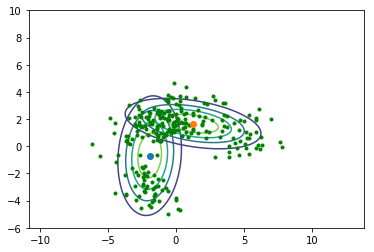

------------------
i:  0  phi:  0.41
i:  0  mu: [-1.96 -0.78]
Sigma:  [[1.67 0.28]
 [0.28 5.95]]
i:  1  phi:  0.59
i:  1  mu: [1.2  1.67]
Sigma:  [[ 7.76 -1.1 ]
 [-1.1   1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1068.0051149744713 -1067.4778102136083


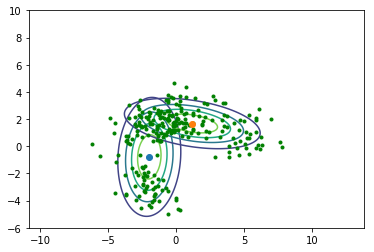

------------------
i:  0  phi:  0.4
i:  0  mu: [-1.99 -0.87]
Sigma:  [[1.63 0.19]
 [0.19 5.85]]
i:  1  phi:  0.6
i:  1  mu: [1.15 1.68]
Sigma:  [[ 7.74 -1.08]
 [-1.08  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1067.4778102136083 -1066.986335100808


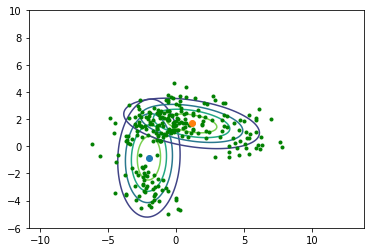

------------------
i:  0  phi:  0.38
i:  0  mu: [-2.02 -0.96]
Sigma:  [[1.6  0.09]
 [0.09 5.73]]
i:  1  phi:  0.62
i:  1  mu: [1.11 1.69]
Sigma:  [[ 7.72 -1.06]
 [-1.06  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1066.986335100808 -1066.5001642092914


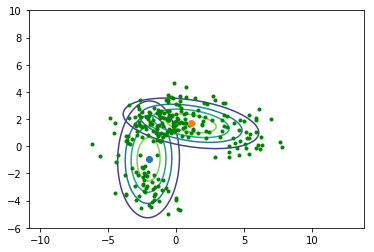

------------------
i:  0  phi:  0.37
i:  0  mu: [-2.05 -1.06]
Sigma:  [[ 1.57 -0.02]
 [-0.02  5.59]]
i:  1  phi:  0.63
i:  1  mu: [1.06 1.69]
Sigma:  [[ 7.69 -1.04]
 [-1.04  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1066.5001642092914 -1065.9886523175844


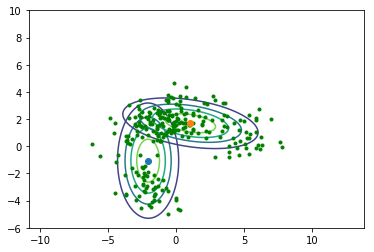

------------------
i:  0  phi:  0.36
i:  0  mu: [-2.08 -1.16]
Sigma:  [[ 1.54 -0.14]
 [-0.14  5.41]]
i:  1  phi:  0.64
i:  1  mu: [1.03 1.7 ]
Sigma:  [[ 7.66 -1.03]
 [-1.03  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1065.9886523175844 -1065.4183209301054


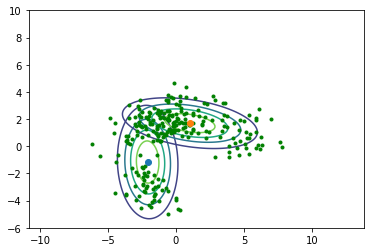

------------------
i:  0  phi:  0.35
i:  0  mu: [-2.12 -1.27]
Sigma:  [[ 1.51 -0.27]
 [-0.27  5.2 ]]
i:  1  phi:  0.65
i:  1  mu: [0.99 1.7 ]
Sigma:  [[ 7.62 -1.01]
 [-1.01  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1065.4183209301054 -1064.751607452245


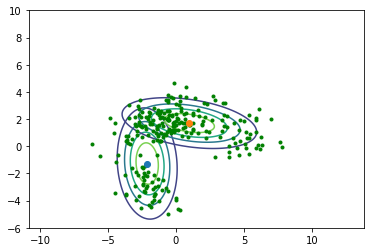

------------------
i:  0  phi:  0.34
i:  0  mu: [-2.16 -1.39]
Sigma:  [[ 1.49 -0.41]
 [-0.41  4.96]]
i:  1  phi:  0.66
i:  1  mu: [0.95 1.71]
Sigma:  [[ 7.58 -1.  ]
 [-1.    1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1064.751607452245 -1063.9501463363845


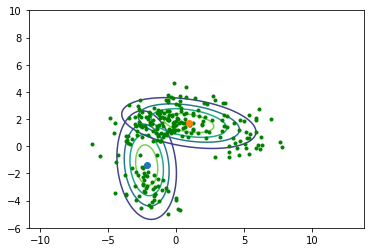

------------------
i:  0  phi:  0.32
i:  0  mu: [-2.19 -1.51]
Sigma:  [[ 1.47 -0.56]
 [-0.56  4.69]]
i:  1  phi:  0.68
i:  1  mu: [0.91 1.71]
Sigma:  [[ 7.54 -0.98]
 [-0.98  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1063.9501463363845 -1062.986246969116


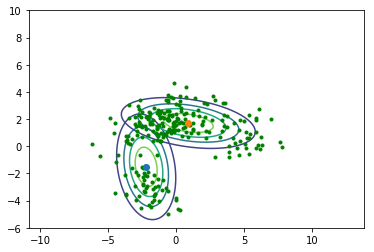

------------------
i:  0  phi:  0.31
i:  0  mu: [-2.23 -1.65]
Sigma:  [[ 1.46 -0.7 ]
 [-0.7   4.4 ]]
i:  1  phi:  0.69
i:  1  mu: [0.86 1.71]
Sigma:  [[ 7.52 -0.96]
 [-0.96  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1062.986246969116 -1061.8574813464802


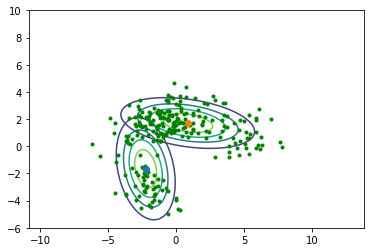

------------------
i:  0  phi:  0.3
i:  0  mu: [-2.25 -1.79]
Sigma:  [[ 1.46 -0.82]
 [-0.82  4.09]]
i:  1  phi:  0.7
i:  1  mu: [0.82 1.71]
Sigma:  [[ 7.5  -0.93]
 [-0.93  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1061.8574813464802 -1060.5829568631113


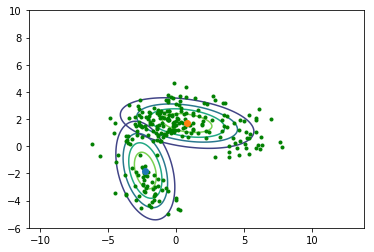

------------------
i:  0  phi:  0.28
i:  0  mu: [-2.27 -1.93]
Sigma:  [[ 1.47 -0.93]
 [-0.93  3.74]]
i:  1  phi:  0.72
i:  1  mu: [0.77 1.7 ]
Sigma:  [[ 7.51 -0.91]
 [-0.91  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1060.5829568631113 -1059.172108093262


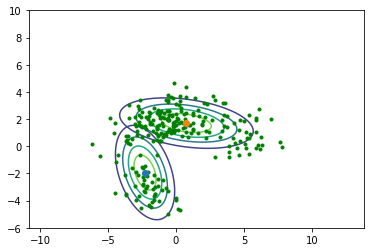

------------------
i:  0  phi:  0.27
i:  0  mu: [-2.29 -2.09]
Sigma:  [[ 1.49 -1.01]
 [-1.01  3.37]]
i:  1  phi:  0.73
i:  1  mu: [0.72 1.7 ]
Sigma:  [[ 7.52 -0.88]
 [-0.88  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1059.172108093262 -1057.5996346246084


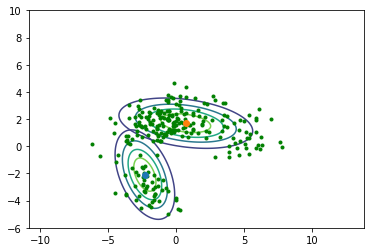

------------------
i:  0  phi:  0.26
i:  0  mu: [-2.29 -2.24]
Sigma:  [[ 1.52 -1.07]
 [-1.07  2.97]]
i:  1  phi:  0.74
i:  1  mu: [0.68 1.69]
Sigma:  [[ 7.55 -0.84]
 [-0.84  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1057.5996346246084 -1055.824172071117


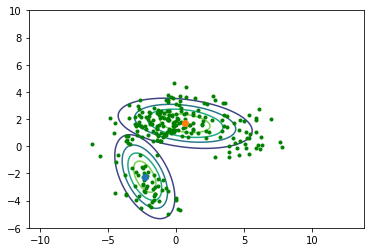

------------------
i:  0  phi:  0.25
i:  0  mu: [-2.29 -2.38]
Sigma:  [[ 1.54 -1.09]
 [-1.09  2.57]]
i:  1  phi:  0.75
i:  1  mu: [0.63 1.68]
Sigma:  [[ 7.6  -0.81]
 [-0.81  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1055.824172071117 -1053.8674669469985


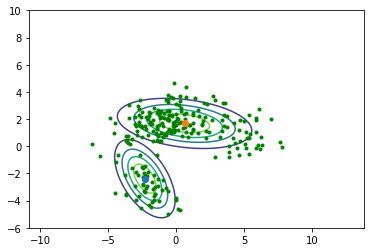

------------------
i:  0  phi:  0.24
i:  0  mu: [-2.27 -2.51]
Sigma:  [[ 1.54 -1.07]
 [-1.07  2.22]]
i:  1  phi:  0.76
i:  1  mu: [0.59 1.67]
Sigma:  [[ 7.65 -0.77]
 [-0.77  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1053.8674669469985 -1051.9339008162428


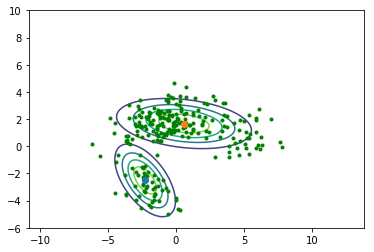

------------------
i:  0  phi:  0.23
i:  0  mu: [-2.24 -2.61]
Sigma:  [[ 1.54 -1.02]
 [-1.02  1.94]]
i:  1  phi:  0.77
i:  1  mu: [0.56 1.66]
Sigma:  [[ 7.72 -0.73]
 [-0.73  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1051.9339008162428 -1050.3553395205602


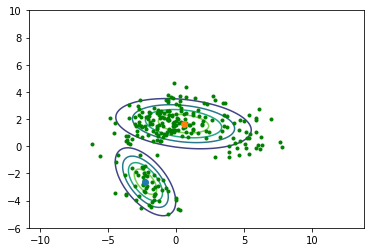

------------------
i:  0  phi:  0.23
i:  0  mu: [-2.22 -2.7 ]
Sigma:  [[ 1.52 -0.95]
 [-0.95  1.72]]
i:  1  phi:  0.77
i:  1  mu: [0.53 1.65]
Sigma:  [[ 7.78 -0.69]
 [-0.69  1.06]]
(EM) stara i nowa funkcja log-wiarygodności:  -1050.3553395205602 -1049.240360566295


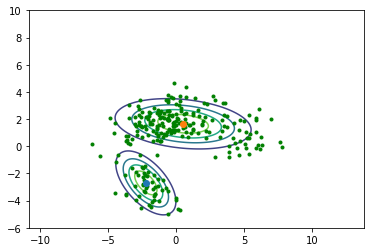

------------------
i:  0  phi:  0.22
i:  0  mu: [-2.19 -2.76]
Sigma:  [[ 1.49 -0.88]
 [-0.88  1.54]]
i:  1  phi:  0.78
i:  1  mu: [0.5  1.65]
Sigma:  [[ 7.84 -0.65]
 [-0.65  1.07]]
(EM) stara i nowa funkcja log-wiarygodności:  -1049.240360566295 -1048.4596561205053


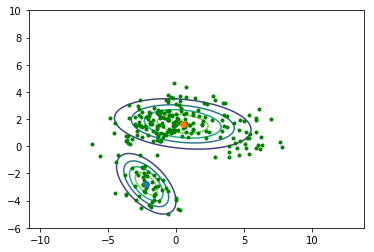

------------------
i:  0  phi:  0.22
i:  0  mu: [-2.16 -2.81]
Sigma:  [[ 1.45 -0.82]
 [-0.82  1.41]]
i:  1  phi:  0.78
i:  1  mu: [0.48 1.64]
Sigma:  [[ 7.89 -0.62]
 [-0.62  1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1048.4596561205053 -1047.9145055728864


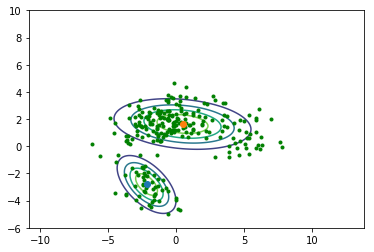

------------------
i:  0  phi:  0.22
i:  0  mu: [-2.15 -2.85]
Sigma:  [[ 1.42 -0.77]
 [-0.77  1.31]]
i:  1  phi:  0.78
i:  1  mu: [0.47 1.63]
Sigma:  [[ 7.92 -0.6 ]
 [-0.6   1.08]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.9145055728864 -1047.5653332994912


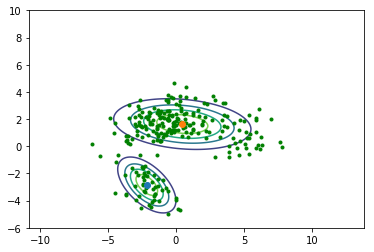

------------------
i:  0  phi:  0.21
i:  0  mu: [-2.13 -2.87]
Sigma:  [[ 1.4  -0.74]
 [-0.74  1.25]]
i:  1  phi:  0.79
i:  1  mu: [0.46 1.63]
Sigma:  [[ 7.95 -0.58]
 [-0.58  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.5653332994912 -1047.3728932480612


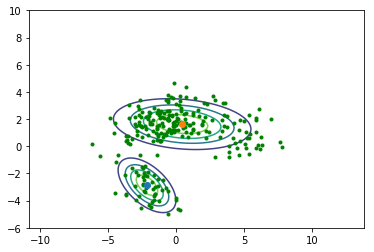

------------------
i:  0  phi:  0.21
i:  0  mu: [-2.12 -2.89]
Sigma:  [[ 1.38 -0.72]
 [-0.72  1.21]]
i:  1  phi:  0.79
i:  1  mu: [0.45 1.63]
Sigma:  [[ 7.97 -0.57]
 [-0.57  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.3728932480612 -1047.2825314084096


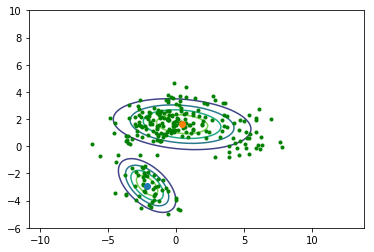

------------------
i:  0  phi:  0.21
i:  0  mu: [-2.12 -2.9 ]
Sigma:  [[ 1.37 -0.7 ]
 [-0.7   1.19]]
i:  1  phi:  0.79
i:  1  mu: [0.45 1.63]
Sigma:  [[ 7.98 -0.56]
 [-0.56  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.2825314084096 -1047.2450155008173


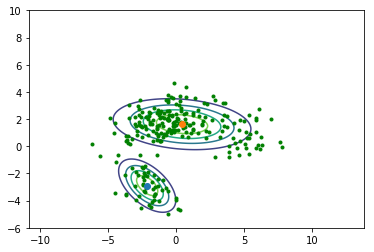

------------------
i:  0  phi:  0.21
i:  0  mu: [-2.11 -2.9 ]
Sigma:  [[ 1.36 -0.7 ]
 [-0.7   1.18]]
i:  1  phi:  0.79
i:  1  mu: [0.44 1.62]
Sigma:  [[ 7.99 -0.56]
 [-0.56  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.2450155008173 -1047.2305363053379


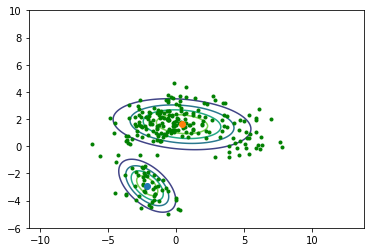

------------------
i:  0  phi:  0.21
i:  0  mu: [-2.11 -2.91]
Sigma:  [[ 1.36 -0.69]
 [-0.69  1.17]]
i:  1  phi:  0.79
i:  1  mu: [0.44 1.62]
Sigma:  [[ 7.99 -0.55]
 [-0.55  1.09]]
(EM) stara i nowa funkcja log-wiarygodności:  -1047.2305363053379 -1047.2251468418026


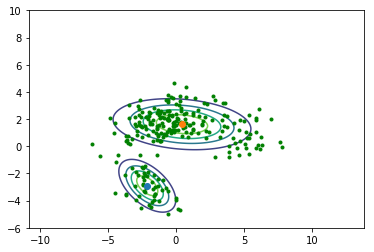

In [7]:
# -*- coding: utf-8 -*-
import random, copy
import sys
import numpy as np
import pylab as py
%matplotlib inline

def prob_mix(params, x):
    '''params - parametry dopasowanego gaussowskiego modelu mieszanego
    x - punkt wejścowy,
    
    funkcja zwraca gestość prawdopodobieństwa, dla x w rozkładzie mieszanym
    '''
    prob = 0
    for i in range(len(params)):
        prob+= pnorm(x, params[i]['mu'], params[i]['sigma']) * params[i]['phi']
    
    
    return prob
def pnorm(x, m, s):
    """
    Oblicza gęstość wielowymiarowego rozkładu normalnego dla punktów
    w wektorze x
    Parametry rozkładu :
    m - średnia
    s- macierz kowariancji
    """
    xmt = np.matrix(x-m).transpose()
    for i in range(len(s)):
        if s[i,i] <= sys.float_info[3]: # min float
            s[i,i] = sys.float_info[3]
    sinv = np.linalg.inv(s)
    xm = np.matrix(x-m)
    return (2.0*np.pi)**(-len(x)/2.0)*(1.0/np.sqrt(np.linalg.det(s)))\
            *np.exp(-0.5*(xm*sinv*xmt))

def draw_params(t,nbclusters):
        '''funkcja do losowania parametrów początkowych
        t - zbiór treningowy
        
        '''
        nbobs,nbfeatures = t.shape
        
        # inicjuje średnie przez losowanie punktu ze zbioru danych
        ind = np.random.randint(0,nbobs)
        tmpmu = np.array([t[ind,:]],np.float64)

        # kowariancje inicjowane są jako macierze diagonalne , 
        # wariancja dla każdej cechy inicjowana jest jako wariancja tej cechy dla całego zbioru 
        sigma = np.zeros((nbfeatures,nbfeatures))
        for f in range(nbfeatures):
            sigma[f,f] = np.var(t[:,f])
            
        #phi inicjujemy tak, że każda składowa mieszanki ma takie same prawdopodobieństwo
        phi = 1.0/nbclusters
        print( 'INIT:')
        print('cetrum: ', tmpmu)
        print('kowariancja:', sigma)
        print('prawd. tego Gaussa: ',phi)
        return {'mu': tmpmu,\
                'sigma': sigma,\
                'phi': phi}
    
def plot_gauss(mu,sigma):
    x = np.arange(-6.0, 10.0001, 0.1)
    y = np.arange(-6.0, 10.0001, 0.1)
    X,Y = np.meshgrid(x, y)
    X.shape = 1,len(x)*len(y)
    Y.shape = 1,len(x)*len(y)
    P = np.vstack((X,Y))
    invS = np.linalg.inv(sigma)
    R = P.T-mu
    z = np.zeros(len(R))
    for i in range(len(R)):
        z[i] = np.exp(-0.5*np.dot( R[i,:].T,np.dot(invS,R[i,:])))
        
    z.shape = len(x),len(y)
    py.contour(x,y,z,5)
    #py.contourf(x,y,z,alpha = 0.75, cmap = 'Blues')
    py.plot(mu[0],mu[1],'o')
    
    
def expectation_maximization(t, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True):
    """
    t - zbiór treningowy, 
    Każdy wiersz t jest przykładem (obserwacją), każda kolumna to cecha 
    'nbclusters' ilość Gaussów, z których budujemy model mieszany
    'nbiter' ilość iteracji
    'epsilon' kryterium zbieżności

    
       Powtórz kroki E i M aż do spełnienia warunku |E_t - E_{t-1}| < ε
    """

    nbobs,nbfeatures = t.shape
   
    ### Normalization
    if normalize:
        for f in range(nbfeatures):
            t[:,f] /= np.std(t[:,f])


    result = {}
    quality = 0.0 # sum of the means of the distances to centroids
    random.seed()
    # szykujemy tablice na prawdopodobieństwa warunowe
    Pz = np.zeros((nbobs,nbclusters)) # P(z|x)
    Px = np.zeros((nbobs,nbclusters)) # P(x|z)
    
    # inicjujemy parametry dla każdego składnika mieszankni
    # params będzie listą taką, że params[i] to słownik
    # zawieraający parametry i-tego składnika mieszanki
    params = []
    for i in range(nbclusters):
        params.append( draw_params(t,nbclusters) )

    old_log_estimate = sys.maxsize         # init, not true/real
    log_estimate = sys.maxsize/2 + epsilon # init, not true/real
    estimation_round = 0    
    # powtarzaj aż zbiegniesz (EM is monotone) <=> < epsilon variation

    while (abs(log_estimate - old_log_estimate) > epsilon\
                and (not monotony or log_estimate < old_log_estimate)):
        restart = False
        old_log_estimate = log_estimate 
        print( "------------------")
        ########################################################
        # krok E: oblicz P(Cluster|obs) dla każdego przykładu #
        ########################################################
        # obliczamy prawdopodobieństwa  Px[j,i] = P(x_j|z_j=i)  
        for j in range(nbobs): # iterujemy po przykładach
            tmpSum = 0.0
            for i in range(nbclusters): # iterujemy po składnikach
                Px[j,i] = pnorm(t[j,:], params[i]['mu'], params[i]['sigma'])
                Pz[j,i] = Px[j,i]*params[i]['phi'] # licznik    
                tmpSum += params[i]['phi']*Px[j,i] # mianownik
            # składamy w całość Pz[j,i] = P(z_j=i|x_j)
            Pz[j,:] /= tmpSum
        
        ###########################################################
        # krok M: uaktualnij paramertry (sets {mu, sigma, phi}) #
        ###########################################################
        
        for i in range(nbclusters):
            # parametr phi
            Sum_w = np.sum(Pz[:,i])
            params[i]['phi'] = Sum_w/nbobs
            if params[i]['phi'] <= 1.0/nbobs:       # restartujemy jeśli zanika nam któraś składowa mieszanki
                restart = True                          
                print( "Restartuje, phi:",params[i]['phi']) 
                break
            print( 'i: ',i,' phi: ', np.around(params[i]['phi'],2))
            
            # średnia
            m = np.zeros(nbfeatures)
            for j in range(nbobs):
                m += Pz[j,i]*t[j,:]
            params[i]['mu'] = m/Sum_w
            print( 'i: ',i,' mu:',np.around(params[i]['mu'],2))
            
            # macierz kowariancji
            s = np.matrix(np.zeros((nbfeatures,nbfeatures)))
            for j in range(nbobs):
                roznica = np.matrix(t[j,:]-params[i]['mu'])
                s += Pz[j,i]*(roznica.T*roznica)
            params[i]['sigma'] = s/Sum_w
            
            print( 'Sigma: ', np.around(params[i]['sigma'],2))
            
            ### Test czy nie zanikają składniki
            if not restart:
                restart = True
                for i in range(1,nbclusters):
                    if not np.allclose(params[i]['mu'], params[i-1]['mu'])\
                    or not np.allclose(params[i]['sigma'], params[i-1]['sigma']):
                        restart = False
                        break
            if restart:                # restart jeśli zanikają
                old_log_estimate = sys.maxsize          # init, not true/real
                log_estimate = sys.maxsize/2 + epsilon # init, not true/real
                params = [draw_params(t,nbclusters) for i in range(nbclusters)]
                print( 'RESTART')
                continue
            
        ####################################
        # Step 4: oblicz the log wiarygodność #
        ####################################
        log_estimate = np.sum([np.log(np.sum(\
                    [Px[j,i]*params[i]['phi'] for i in range(nbclusters)]))\
                    for j in range(nbobs)])
        print( "(EM) stara i nowa funkcja log-wiarygodności: ",\
                    old_log_estimate, log_estimate)
     
        ##########################
        # rysuj wyniki
        ##########################
        py.figure()
        py.plot(x[:,0],x[:,1],'g.')
        for i in range(nbclusters):
            plot_gauss(np.array(params[i]['mu']),np.array(params[i]['sigma']))
        
        py.axis('equal')
        py.show()
 
        
        # Pick/save the best clustering as the final result
        quality = -log_estimate
        if not quality in result or quality > result['quality']:
            result['quality'] = quality
            result['params'] = copy.deepcopy(params)
            result['clusters'] = [[o for o in range(nbobs)\
                    if Px[o,c] == max(Px[o,:])]\
                    for c in range(nbclusters)]
    return result


##########################################
#   PROGRAM
#########################################


# robimy mieszankę dwóch gaussów:
#parametry rozkładu
# wektor średnich:
mu1 = [-2,-3] 
# macierz kowariancji:
Sigma1 = np.array([[1, -0.5],
                  [-0.5, 1]])
# generujemy dane: 
x1 = np.random.multivariate_normal(mu1, Sigma1, 50) #
mu2 = [-0.5,2] 
# macierz kowariancji:
Sigma2 = np.array([[3, 0.5],
                  [0.5, 1]])
# generujemy dane: 
x2 = np.random.multivariate_normal(mu2, Sigma2, 150) #
# łączymy x1 i x2 aby otrzymac jeden zbiór

mu3 = [4.5,1] 
# macierz kowariancji:
Sigma3 = np.array([[3, -0.5],
                  [-0.5, 1]])
# generujemy dane: 
x3 = np.random.multivariate_normal(mu3, Sigma3, 50) #
# łączymy x1 i x2 aby otrzymac jeden zbiór



x = np.vstack((x1,x2,x3))
print('Rozmiar zbioru uczącego: ', x.shape)
py.plot(x[:,0],x[:,1],'g.')
py.axis('equal')
py.show()

res = expectation_maximization(x, nbclusters=2, nbiter=1, normalize=False,\
        epsilon=0.01, monotony=False, datasetinit=True)


        

Gdybyśmy chcięli teraz zbadać prawdopodobieństwo jakiegoś nowego przypadku w tym rozkładzie:

In [9]:
xx=(1,2)
print( 'P(x=(',str(xx),')):', prob_mix(res['params'], xx))

P(x=( (1, 2) )): [[0.03910782]]


# Sztuczne neurony

## Krótka historia sztucznych sieci neuronowych
* [McCulloch i Pitts (1943)](http://www.cse.chalmers.se/~coquand/AUTOMATA/mcp.pdf): pierwszy matematyczny opis działania neuronu i przetwarzania przez niego danych. Proste neurony, które mogły modelować funkcje logiczne takie jak OR lub AND; w ich pracach nie ma jeszcze opisu koncepcji uczenia
<img src="https://drive.google.com/uc?id=12L5oKjKQ2rhIAj4b2oig0pJNIKbv7rG2" width = 1000px>

    
[](McCulloch_abstract.png)

* Von Neumann: [The computer and the brain (1958): historyczna praca teoretyczna](http://www.leydesdorff.net/vonneumann/). Wprowadza pomysł uczenia zamiast programowania.
* [Perceptron Rosenblatta](http://en.wikipedia.org/wiki/Frank_Rosenblatt) (1958): rozpoznawanie znaków alfanumerycznych, sam perceptron symulowany był na komputerze IBM 704 w Cornell Aeronautical Laboratory. Realizacja sprzętowa: [opis: ](http://csis.pace.edu/~ctappert/srd2011/rosenblatt-contributions.htm) zdjęcie: 
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/11/Frank-Rosenblatt-Perceptron.jpg" width=1000>

  * Był wrażliwy na transformacje znaków
  * Działał poprawnie (w zakresie swoich możliwości) nawet po uszkodzeniu kilku jednostek
* ADALINE (ADAptive LInear Element): stworzony w 1960 przez Widrowa i Hoffa (ze Stanford University). ADALINE był analogowym urządzeniem elektronicznym .
* Okres frustracji i zniechęcenia: W 1969 Minsky i Papert w swojej książce dowodzili ograniczenia jednowarstwowych sieci neuronowych typu perceptronu i uogólnili je na sieci wielowarstwowe: 
>"...our intuitive judgment that the extension (to multilayer systems) is sterile”.

Efekt: obcięcie funduszy na badania sieci neuronowych

Lata 70-te były okresem zahamowania funduszy, ale wymyślono w tym czasie kilka ciekawych rozwiązań:
* Anderson i Kohonen niezależnie opracowali koncepcję sieci asocjacyjnych.
* Werbos (1974) po raz pierwszy opracował i użył metody wstecznej propagacji błędu do uczenia sieci neuronowej, ale musiało minąć kilka lat zanim pomysł ten się rozpowszechnił.
* Fukushima (F. Kunihiko) w 1975 zbudował Cognitron a w 1978 rozbudowana wersja — [Neocognitron](http://www.scholarpedia.org/article/Neocognitron) potrafiła rozpoznawać nawet bardzo skomplikowane znaki (pismo chińskie) i była odporna na zniekształcenia, przeskalowania, przesunięcia i obroty znaków.
* ART Steve Grossberg i Gail Carpenter w 1988 wymyślili, w oparciu o analogie biologiczne, sieci [ART (Adaptive Resonance Theory)](http://www.scholarpedia.org/article/Adaptive_resonance_theory).

Od końca lat 80-tych, na skutek nagromadzenia pozytywnych przykładów i rozwoju komputerów pozwalających na symulacje sieci neuronowych, nastąpił gwałtowny rozwój badań nad sieciami neuronowymi.

## Ogólne spojrzenie na sieci neuronowe
* Źródłem inspiracji wspólnym dla większości sztucznych sieci neuronowych jest  mózg.
![](http://www.braininitiative.org/wp-content/uploads/2016/12/BRAIN-PImtg-Image-transparent-e1480982518841.png)

### Za funkcje intelektualne odpowiada głównie kora mózgowa. Jej grubość to ok. 3mm 5–6 warstw komórek nerwowych. 
![](https://upload.wikimedia.org/wikipedia/commons/9/9a/Brainmaps-macaque-hippocampus.jpg)

* Mózg składa się z prawie biliona (10<sup>12</sup>) komórek nerwowych, czyli neuronów i wspomagających ich pracę komórek glejowych, których jest dziesięciokrotnie więcej. 
![Schematyczny rysunek neuronu](424px-Neuron-figure_PL.svg.png)


* Każdy neuron może się łączyć, przez wypustki zwane aksonami, nawet z ponad dziesięcioma tysiącami innych neuronów. 
* Miejsce połączenia zakończenia aksonu z ciałem następnego neuronu zwane jest synapsą. [https://www.youtube.com/watch?v=aDKz3GUVAzg]
* Przetwarzanie informacji w neuronie opiera się na sumowaniu potencjałów postsynaptycznych, powstających w odpowiedzi na impulsy dochodzące z zakończeń aksonów innych neuronów. [https://www.youtube.com/watch?v=L66-6wleTqA]
* Jeśli wypadkowy potencjał przekroczy próg, generowany jest impuls, który przemieszcza się wzdłuż aksonu jako potencjał czynnościowy. 
* Gdy dotrze do synapsy, pobudza kolejny neuron drogą chemiczną, dzięki neurotransmiterom (wyjątkiem są synapsy elektryczne, występujące częściej niż sądzono pierwotnie). 
* Jeśli suma wygenerowanych w ten sposób potencjałów postsynaptycznych przekroczy próg pobudzenia, generowany jest kolejny potencjał czynnościowy, który przemieszcza się... itd.


## Ogólne cechy sieci neuronowych
* odporność na zniekształcenia bodźców 
* odporność na uszkodzenia fragmentów sieci 
* zdolność do generalizacji zdobytej wiedzy 
* uczenie przykładami zamiast programowania algorytmicznego 
* równoległe przetwarzanie danych - szczególnie interesująca własność w przypadku implementacji na maszynach wieloprocesorowych i  hardware'owych.

## Typy modeli sieci
To w jaki sposób modeluje się sieć neuronową zależy w dużej mierze od tego, do jakiego celu ma służyć dany model. Wraz z rozwojem dziedziny modelowania sieci neuronowych wyraźnie zarysował się podział na:
* Biologicznie realistyczne sieci neuronowe — modelowanie i testowanie hipotez dotyczących biologicznych sieci neuronowych. Tym nurtem nie będziemy zajmować się na tych zajęciach.
* Sztuczne sieci neuronowe do zastosowań technicznych i praktycznych. Ten typ sieci będziemy dalej rozważać.

## Sieci w technice
W kontekście zastosowań technicznych ogólnie możemy powiedzieć, że:
* Sieć neuronowa, to zbiór połączonych prostych jednostek przetwarzających, których działanie jest luźno inspirowane biologicznymi neuronami.
* Wiedza i możliwości sieci przechowywane są w postaci architektury sieci i siły (wagi) połączeń pomiędzy jednostkami. Wagi ustalane są w procesie zwanym uczeniem.

![Prosta jednostka przetwarzająca.](Sztuczny_neuron.png)
Jednostka przedstawiona na powyższym rysunku wykonuje następujące obliczenia:
$y = f \left( \sum_{i=1}^n x_i w_i + w_0 \right) $

$f$ to funkcja aktywacji

## Uczenie bez nauczyciela w sieciach neuronowych: Reguła Hebba 

Zaczniemy od omówienia metody inspirowanej hipotezą biologiczną:

![By user:Looie496 created file, US National Institutes of Health, National Institute on Aging created original - http://www.nia.nih.gov/alzheimers/publication/alzheimers-disease-unraveling-mystery/preface, Public Domain, https://commons.wikimedia.org/w/index.php?curid=8882110](Chemical_synapse_schema_cropped.jpg)

> "When an axon of cell A is near enough to excite cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased."

lub w skrócie "What fires together wires together"

![](Hebb.png)

* Koncepcja ta pochodzi od Kanadyjskiego psychologa Donalda Oldinga Hebba, stąd jej nazwa. 
* Najprościej można ją ująć tak, że synapsa łącząca dwa neurony ulega wzmocnieniu jeśli neuron pre- i post synaptyczny są jednocześnie aktywne. 
* Innymi słowy siłą napędową uczenia Hebbowskiego są korelacje aktywności neuronów pre- i post synaptycznych.

W kontekście sztucznej sieci neuronowej można ją wyrazić następująco:

Niech:
* $m$ - indeks neuronu, 
* $x_{i}^{(j)}$ - $i$-te wejście do tego neuronu pochodzące z $j$-ego przykładu, 
* $y_{m}^{(j)}$ wyjście wytworzone przez $m$-ty neuron na $j$-ty przykład.

Wtedy hebbowska reguła zmiany wag jest następująca:

$\qquad$$
\Delta w_{i}^{(m)(j)} = \eta x_{i}^{(j)}y_{m}^{(j)}
$

> Zauważmy, że jest ona "napędzana" korelacją pomiędzy wejściem a wyjściem.

## Dlaczego ta reguła działa?

Jeśli w chwili początkowej, któryś neuron miał zestaw wag zbliżony do prezentowanego sygnału to w następnych pokazach tego samego sygnału “reakcja” tego neuronu na ten sygnał będzie coraz silniejsza. Sieć tak uczona zaczyna klasyfikować sygnały.

## Ograniczenia:
* przebieg uczenia zależy od wartości początkowych wag
* nie ma gwarancji, że jednej klasie wzorców będzie odpowiadał jeden neuron
* nie ma gwarancji, że wszystkie klasy wzorców będą miały oddzielne reprezentacje w postaci oddzielnych zbiorów aktywnych neuronów

# Uczenie z rywalizacją: sieci Kohonena

Częściowe rozwiązanie wymienionych powyżej ograniczeń można uzyskać stosując tzw. uczenie z rywalizacją w sieciach liniowych Kohonena. Reguła zmiany wag jest w tym przypadku następująca:

$\qquad$$
\Delta w_{i}^{(m^{*})(j)} = \eta (\tilde{x}_{i}\;^{(j)} - w_{i}^{(m^{*})(j)})
$

* W danym kroku uczenia modyfikacjom podlegają wagi tylko jednego "zwycięskiego" neuronu $m^{*}$, tzn. tego który daje największe wyjście:

$\qquad$$y_{m^{*}}^{(j)} = \max _{m} y_{m}^{(j)} $

* wektor wejściowy jest znormalizowany (to symbolizuje $\tilde{x}\;$). Dzięki temu mamy gwarancję, że zwycięski neuron to ten, którego wektor wag jest najbardziej podobny do wejścia.

Dzięki powyższym warunkom uzyskujemy następującą własność: jeśli w zbiorze uczącym występują jakieś skupiska to wektory wag są modyfikowane w kierunku wartości średnich w tych skupiskach.

![](kohonen.png)

# Podsumowanie:
* zbiór uczący dla uczenia bez nauczyciela
* algorytm k_means
* algorytm EM
* Reguła Hebba